This assignment is about fitting a Linear Regression Model for the data. To do this assignment you are expected to complete till Week 2 of the prescribed course.
Make a folder named "Assignment 2", in the same repository that you submitted, and copy this notebook and the dataset to the directory. I won't be guiding you through to make commits, this time you have to decide your checkpoints to do the versioning.

The below cell has been left to import python modules.

In [39]:
#import modules here
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Let's get started, open the file and import the two columns (they are comma separted values, google how to read csv lines). The first column represents your y values and the second column represents your x values. Make numpy arrays for y and x. Chose your naming convention of arrays as y and x only. (If you don't know how to read a file in python, google for it).

In [6]:
#get data
x=np.array([])
y=np.array([])

file=open('data.txt','r')#opening file
for line in file.readlines():
    nums=line.split(',')#to create array of numericals separated by ','
    #appending values to arrays
    x=np.append(x,float(nums[1]))
    y=np.append(y,float(nums[0]))

file.close()

print(x,'\n',"AND\n",y)
    

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705] 
 AND
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  

The very first step to handle a dataset is to draw first-hand inferences as much as possible. Those inferences play a very vital role while actually desinging and deciding models. The first step to do so is to have plots and compute some statistics of the data. We will only do a plot, if you want you can do further analysis. Using matplotlib plot a scatterplot of the y values against the x values. (again google if you don't know how to do)

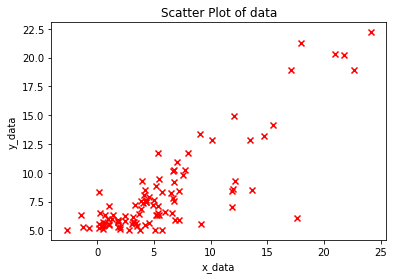

In [11]:
#plot
plt.scatter(x,y,label='data',color='r',marker='x')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Scatter Plot of data')

plt.show()

From the plot it seems that a linear fit to the available data is a plausible model (other than the fact that you haven't gone through other models yet :) ), so we have now decided we will perform a linear regression for the data using gradient descent. \
Let's have some revision...\
We have seen a sample cost function( we will use the same, but cost functions are very interesting, do try to think of some alternate cost functions too which can be good for linear fits )$$ J(\theta) = \frac{1}{2m}\Sigma_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
where $$ h_{\theta}(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

So as an implementation we will have a 1x2 vector theta( numpy will come handy ) and since we already have x vector and y vector, it's actually quite simple to implement $J(\theta)$.

Now recall the update step of $\theta$,
$$\theta_j = \theta_j - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$
So after choosing a parameter $\alpha$ we are good to go. Keep in mind that the update has to be done for all $\theta_j$s, you can do the simultaneous vectorized updates using numpy arrays.

Ok enough theory, lets implement a function. \
Implement function **gradientdescent(y, x, theta, alpha)** that returns a list of size 2 - [updatedtheta, currentcost] . Note - The current cost is the cost calculated with the updated $\theta$.

In [12]:
def gradientdescent(y, x, theta, alpha):
    sigma_0=0 #initialising variables to find sigma term of the formula
    sigma_1=0
    m=len(x)
    for i in range(len(x)):
        sigma_0+=(theta[0]+theta[1]*x[i]-y[i])
        sigma_1+=(theta[0]+theta[1]*x[i]-y[i])*x[i]
        
    theta[0],theta[1]=theta[0]-alpha*sigma_0/m,theta[1]-alpha*sigma_1/m# simultaneous updatation
    
    cost=0
    for i in range(len(x)):# lop for finding cost for particular theta values
        cost+=(theta[0]+theta[1]*x[i]-y[i])**2
    cost=cost/(2*m)
    
    return theta,cost

Now it's time to call the function. Run for 1500 iterations (you can tweak it yourself too). Initialise your theta vector to [0,0] or you can even do randomly( will it matter? ). Take alpha to be 0.01( don't worry about tuning, you will know about it later ). Now run the loop and keep on updating theta and maintain an array where you keep on adding the cost values returned at each iteration. Store the final value of theta.

In [31]:
#perform iterations using the above function
def iteration(y,x,n,alpha):# function that would perform n iterations of gradientdescent function 
    theta=[0,0]
    cost_arr=np.array([])
    for i in range(n):
        theta,temp=gradientdescent(y,x,theta,alpha)
        cost_arr=np.append(cost_arr,temp)
    return theta,cost_arr

theta,cost=iteration(y,x,1500,0.01)
print("theta=",theta,'\n',"cost",cost)

theta= [4.719519081906591, 0.5888354137873362] 
 cost [11.36034739  7.65982708  7.15825515 ...  2.20818996  2.20818992
  2.20818988]


Now it's time to analyse again. Using matplotlib, plot y vs x and on the same plot draw the line $y = \theta_0 + \theta_1x $ using the final theta values obtained. Also plot the curve of the cost array against the no. of the iterations. If you want you can further change alpha and no. of iterations to check how they affect the regression.

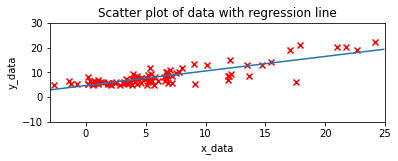

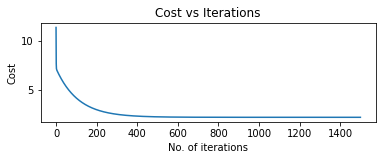

In [38]:
#plot line and data together
def h(theta,x):
    return theta[0]+theta[1]*x


plt.subplot(211)#subplot for regression line
x_part=np.arange(-5,25,0.1)
plt.scatter(x,y,label='data',color='r',marker='x')
plt.plot(x_part,h(theta,x_part))
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.xlim([-3,25])
plt.ylim([-10,30])
plt.title('Scatter plot of data with regression line')
plt.show()

plt.subplot(212) #subplot for cost
x_part=np.arange(0,1500,1)
plt.plot(x_part,cost)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

You can see you have obtained a linear fit to the data. Welcome to Machine Learning.
With the help of the trained theta we can estimate the values for x's for which y's have not been measured. The iteration you did to update theta is called the training. And the weights( in this case theta ) obtained after training, can be saved for use in applications, and definitely it's not as easy as this everytime. 

Let's get going. You implemented linear regression from scratch, let's now look at a fascinating python library - scikit-learn (imported as sklearn). Find installation procedure and official documentation here- https://scikit-learn.org/stable/ . Now perform a linear regression directly using scikit-learn and plot the line(using slope and intercept obtained in the model). Here you don't even have to worry about chosing hyperparameter alpha. Do check out other features of the library too. Hint -https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

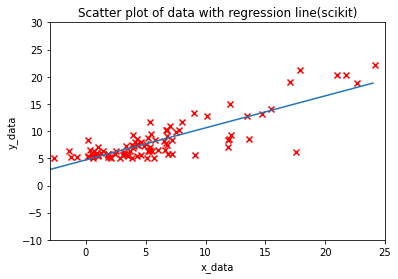

In [41]:
#implement linear regression using sklearn
x_colmn=x.reshape((-1,1))
model=LinearRegression()
model.fit(x_colmn,y)
sc_theta_0=model.intercept_
sc_theta_1=model.coef_

def sc_h(x):
    return sc_theta_0+sc_theta_1*x

x_part=np.arange(-5,25,1)
plt.scatter(x,y,label='data',color='r',marker='x')
plt.plot(x_part,sc_h(x_part))
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.xlim([-3,25])
plt.ylim([-10,30])
plt.title('Scatter plot of data with regression line(scikit)')
plt.show()

As you proceed through the course, do check-out their equivalent models in scikit-learn.